In [84]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import pickle

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sklearn
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)

In [88]:
Flask.__version__

NameError: name 'Flask' is not defined

# Data loading

In [3]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Understanding

In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

Columns car_name and year can be removed 

# Data cleansing

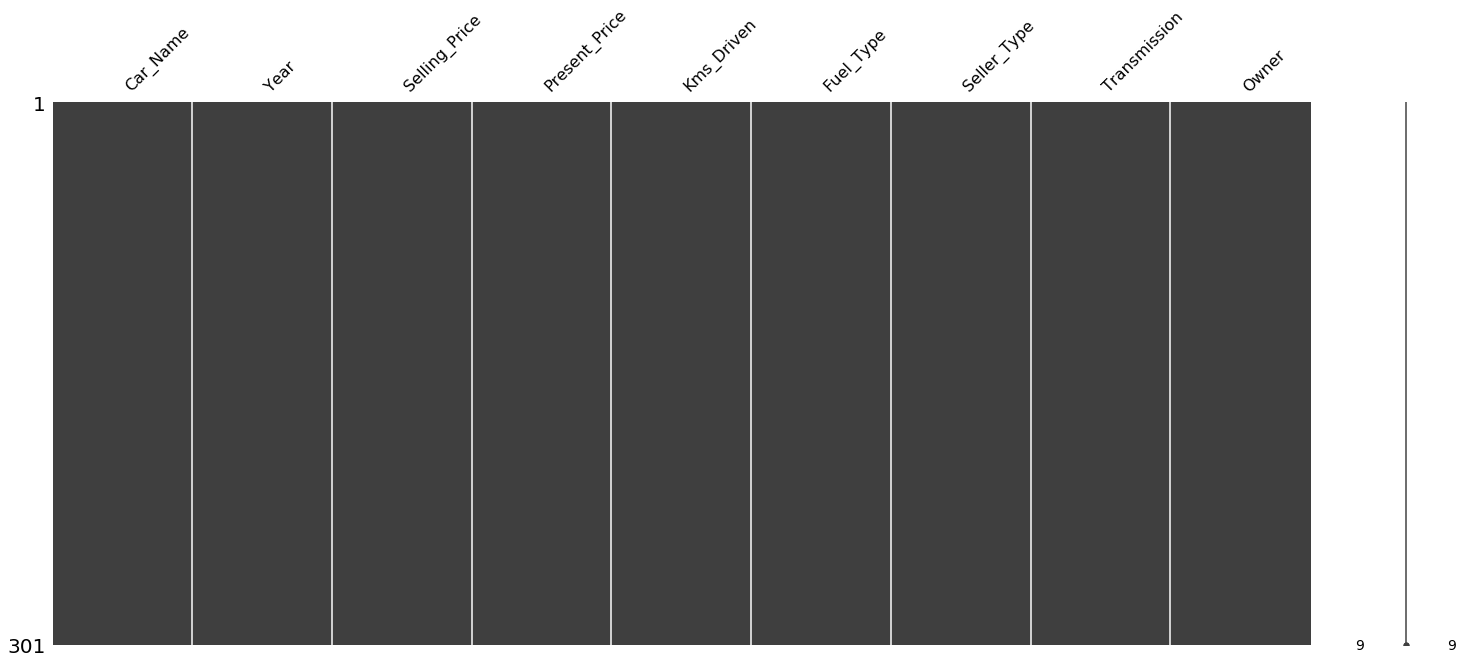

In [6]:
msno.matrix(df);

No null values in the data

In [7]:
clean_df = df.copy()
clean_df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [8]:
# change year to number
clean_df['present_year'] = 2021
clean_df['Year_number'] = clean_df['present_year'] - clean_df['Year']
clean_df['Year_number'].unique()

array([ 7,  8,  4, 10,  3,  6,  5, 12, 11,  9, 18, 13, 15, 16, 17, 14],
      dtype=int64)

In [9]:
# drop the year related columns
clean_df.drop(['Year', 'present_year', 'Car_Name'], axis=1, inplace=True)
clean_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_number
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [10]:
# create dummies for the object types in the data
clean_df = pd.get_dummies(clean_df, drop_first=True)
clean_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_number,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


# EDA

Before log transform


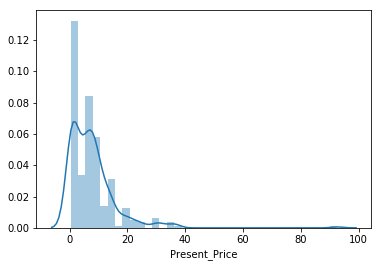

In [11]:
print('Before log transform')
sns.distplot(clean_df['Present_Price']);

After log transform


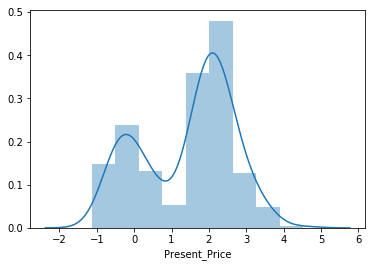

In [12]:
print('After log transform')
sns.distplot(np.log(clean_df['Present_Price']));

case is similar with label (selling price) and kms driven 

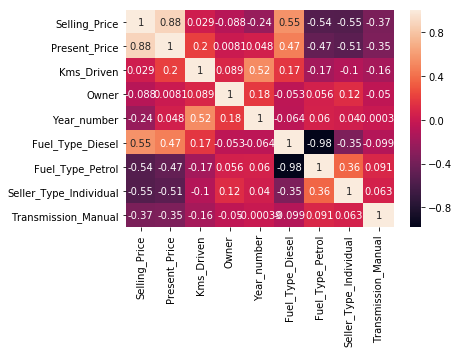

In [13]:
# correlation
sns.heatmap(clean_df.corr(), annot=True);

# Data preparation

In [70]:
eda_df = clean_df.copy()
# log transform
# eda_df['Present_Price'] = eda_df['Present_Price'].apply(lambda x : np.log(x))
# eda_df['Kms_Driven'] = eda_df['Kms_Driven'].apply(lambda x : np.log(x))
eda_df['Selling_Price'] = eda_df['Selling_Price'].apply(lambda x : np.log(x))

In [15]:
# scaling

scale_cols =['Present_Price', 'Kms_Driven', 'Year_number', 'Owner']

scaler = StandardScaler()

# transform data
scaler.fit(eda_df[scale_cols])
scaled = scaler.transform(eda_df[scale_cols])

# to df
scaled_df = pd.DataFrame(scaled, columns=scale_cols)

D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [71]:
# label
label_df = eda_df.Selling_Price

# drop
eda_df.drop(['Selling_Price'], axis=1, inplace=True)
# eda_df.drop(scale_cols, axis=1, inplace=True)

In [72]:
eda_df.head()

,Present_Price,Kms_Driven,Owner,Year_number,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [18]:
# concat
X = pd.concat([scaled_df, eda_df], axis=1)
X.head()

,Present_Price,Kms_Driven,Year_number,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.236198,0.083911,-0.128897,-0.174501,0,1,0,1
1,0.674460,0.543824,0.217514,-0.174501,1,0,0,1
2,0.700680,-1.264426,-1.168129,-0.174501,0,1,0,1
3,-0.008035,-1.543976,0.910335,-0.174501,0,1,0,1
4,0.405254,0.531102,-0.128897,-0.174501,1,0,0,1


# Modelling

In [73]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(eda_df, label_df, test_size=0.25, random_state=23)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (225, 8)
x test:  (76, 8)
y train:  (225,)
y test:  (76,)


In [74]:
def adjusted_r_squared(actual, pred, train):
    '''
    cal
    '''
    n = train.shape[0]
    p = train.shape[1]
    
    r2 = r2_score(actual, pred)
    
    value = (n-1) / (n-p-1)
    
    return (1- (1-r2) * value)

In [75]:
# Training model
# model = LinearRegression()
model = RandomForestRegressor(max_depth=5, n_estimators=500, random_state=0)

In [76]:
model.fit(X_train,y_train)

# R2 score of train set
y_pred_train = model.predict(X_train)
adjusted_r_squared(y_train,y_pred_train, X_train)

0.9868501717914574

In [77]:
# on test set
y_pred = model.predict(X_test)
print('mean absolute error : ', mean_absolute_error(y_test, y_pred))
print('mean squared error : ', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

mean absolute error :  0.14786330925715876
mean squared error :  0.03998779801185726
RMSE: 0.1999694927029052


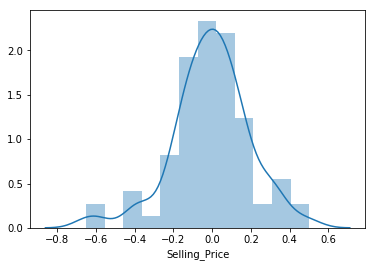

In [81]:
sns.distplot(y_test - y_pred);

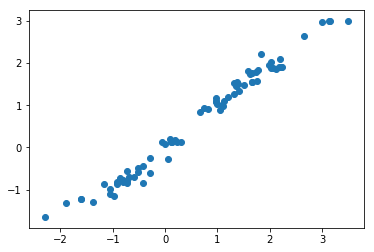

In [82]:
plt.scatter(y_test, y_pred);

In [59]:
# save model to local disk
filename = 'save_model.pkl'
pickle.dump(model, open(filename, 'wb'))